Dataset Preprocess (news.csv)

- LOAD DATASET

In [5]:
import pandas as pd

# Load the datasets
news_df = pd.read_csv("Dataset\\news.csv")

# Display first few rows
print(news_df.head(7))
print( len(news_df))



         date                                               news       neg  \
0  2007-07-07  It was a long antipodean night. While there’s ...  0.059000   
1  2007-07-07  In Mexico there are no licensing or registrati...  0.044000   
2  2007-07-07  The government has until Monday to protect the...  0.000000   
3  2007-07-07  A record-breaking heat wave in the Southwest i...  0.197505   
4  2007-07-07  England started its Live Earth concert at Wemb...  0.033000   
5  2007-07-07  The Lewis Hamilton effect is felt everywhere. ...  0.000000   
6  2007-07-07  The Sam’s Army ratings polls reflect the gener...  0.102000   

       neu       pos  compound sentiment  
0  0.87800  0.064000  0.051600  POSITIVE  
1  0.95600  0.000000 -0.296000  NEGATIVE  
2  0.89400  0.106000  0.381800  POSITIVE  
3  0.66149  0.141005  0.997491  POSITIVE  
4  0.94500  0.022000 -0.177900  NEGATIVE  
5  0.96500  0.035000  0.361200  POSITIVE  
6  0.78600  0.112000  0.340000  POSITIVE  
427482


- Subset news dataset based on date

In [3]:
# Load the datasets
news_df = pd.read_csv("Dataset\\news.csv")

# Filter data where date is between 2018 and 2024 (inclusive)
start_date = "2018-01-01"
end_date = "2024-12-31"
mask = (news_df["date"] >= start_date) & (news_df["date"] <= end_date)
filtered_df = news_df.loc[mask]

# Save the filtered DataFrame to a new CSV file
filtered_df.to_csv("Dataset\\news(2018-2024).csv", index=False)
print(filtered_df.head(7))
print(f"Filtered dataset saved. Rows retained: {len(filtered_df)}")

              date                                               news  \
164892  2018-01-01  Readers point to Congress, the Federal Railroa...   
164893  2018-01-01  The president of the Association of American U...   
164894  2018-01-01  Readers discuss family estrangement from the p...   
164895  2018-01-01  Vivir de forma segura en Caracas, una de las c...   
164896  2018-01-01  He proposed talks with South Korea to discuss ...   
164897  2018-01-01  It was an oddly quiet end to a season of debat...   
164898  2018-01-01  A reader decries a “draconian” plan to separat...   

             neg       neu       pos  compound sentiment  
164892  0.070000  0.881723  0.048277  0.992577  POSITIVE  
164893  0.530158  0.450715  0.019127  0.972401  NEGATIVE  
164894  0.094386  0.861070  0.044543  0.997616  POSITIVE  
164895  0.072592  0.854535  0.072872  0.871290  NEGATIVE  
164896  0.170111  0.734821  0.095068  0.789347  NEGATIVE  
164897  0.401177  0.549672  0.049151  0.926559  NEGATIVE  
16

EDA news(2018-2024) - Misspelled Word

In [ ]:
from symspellpy.symspellpy import SymSpell, Verbosity
import pandas as pd
import re

eda_df = pd.read_csv("Dataset\\news(2018-2024).csv") 
text_column = "news"  #


sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

dictionary_path = "frequency_dictionary_en_82_765.txt" 
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

def detect_misspelled_words(text):
    words = re.findall(r"\b[a-zA-Z]+\b", text.lower())  
    misspelled = []
    for word in words:
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        if not suggestions or suggestions[0].term != word:
            misspelled.append(word)
    return misspelled

all_misspelled = set()
for row in eda_df[text_column].dropna():
    detected = detect_misspelled_words(row)
    all_misspelled.update(detected)


print(f"Total unique detected misspelled words: {len(all_misspelled)}")
print("Sample of detected misspelled words:")
print(sorted(list(all_misspelled))[:500])  


2025-09-30 15:58:43,306: E symspellpy.symspellpy] Dictionary file not found at frequency_dictionary_en_82_765.txt.


Total unique detected misspelled words: 83307
Sample of detected misspelled words:
['a', 'aa', 'aaa', 'aaaaaaaaaaaaaahhhhh', 'aaaah', 'aadhaar', 'aafia', 'aalborg', 'aaliyah', 'aalst', 'aalto', 'aamann', 'aamanns', 'aamir', 'aamodt', 'aamya', 'aanoch', 'aapi', 'aapisherose', 'aardman', 'aardvark', 'aarhus', 'aari', 'aarmy', 'aaron', 'aarons', 'aaronson', 'aarp', 'aarthi', 'aasif', 'aastha', 'aatish', 'ab', 'ababa', 'aback', 'abaco', 'abacus', 'abad', 'abadi', 'abadilla', 'abaire', 'abakar', 'abalone', 'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons', 'abasan', 'abasement', 'abashed', 'abasing', 'abasolo', 'abasta', 'abate', 'abated', 'abatement', 'abates', 'abating', 'abaya', 'abayas', 'abba', 'abbas', 'abbasi', 'abbasov', 'abbess', 'abbey', 'abbi', 'abbie', 'abbigail', 'abbington', 'abbkr', 'abbo', 'abbot', 'abbott', 'abbreviated', 'abbreviation', 'abbreviations', 'abbvie', 'abby', 'abbygail', 'abc', 'abcs', 'abd', 'abdalla', 'abdallah', 'abdel', 'abdelaziz', 'abdelhami

- EDA news(2018-2024)

In [5]:
import pandas as pd
from symspellpy.symspellpy import SymSpell, Verbosity
import re
from tabulate import tabulate 
from spellchecker import SpellChecker
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from datetime import datetime
import nltk
import string
import emoji
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JohnTan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
#Load dataset news(2018-2024)
eda_df = pd.read_csv("Dataset\\news(2018-2024).csv")

# Display first few rows
print(eda_df.head(7))
print("\n Total number of rows: ",len(eda_df))

         date                                               news       neg  \
0  2018-01-01  Readers point to Congress, the Federal Railroa...  0.070000   
1  2018-01-01  The president of the Association of American U...  0.530158   
2  2018-01-01  Readers discuss family estrangement from the p...  0.094386   
3  2018-01-01  Vivir de forma segura en Caracas, una de las c...  0.072592   
4  2018-01-01  He proposed talks with South Korea to discuss ...  0.170111   
5  2018-01-01  It was an oddly quiet end to a season of debat...  0.401177   
6  2018-01-01  A reader decries a “draconian” plan to separat...  0.730084   

        neu       pos  compound sentiment  
0  0.881723  0.048277  0.992577  POSITIVE  
1  0.450715  0.019127  0.972401  NEGATIVE  
2  0.861070  0.044543  0.997616  POSITIVE  
3  0.854535  0.072872  0.871290  NEGATIVE  
4  0.734821  0.095068  0.789347  NEGATIVE  
5  0.549672  0.049151  0.926559  NEGATIVE  
6  0.261318  0.008599  0.981957  NEGATIVE  

 Total number of rows:

In [11]:
# Overview of the data structure
print("Shape:", eda_df.shape)
print("\nInfo:")
print(eda_df.info())
print("\nMissing values:\n", eda_df.isnull().sum())
print("\nDuplicate rows:", eda_df.duplicated().sum())

Shape: (262590, 7)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262590 entries, 0 to 262589
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   date       262590 non-null  object 
 1   news       262590 non-null  object 
 2   neg        262590 non-null  float64
 3   neu        262590 non-null  float64
 4   pos        262590 non-null  float64
 5   compound   262590 non-null  float64
 6   sentiment  262590 non-null  object 
dtypes: float64(4), object(3)
memory usage: 14.0+ MB
None

Missing values:
 date         0
news         0
neg          0
neu          0
pos          0
compound     0
sentiment    0
dtype: int64

Duplicate rows: 0


In [8]:
#Descriptive Analysis
def print_stats(stats_df, title):
    print(f"\n{title} Statistics:")
    print("="*50)
    print(stats_df.to_markdown(tablefmt="grid", stralign='center', numalign='center'))
    print("="*50)


eda_df["length"] = eda_df["news"].apply(lambda x: len(x.split()))
grouped_stats = eda_df.groupby('sentiment')["length"].agg(['max', 'min', 'mean', 'median', 'std', 'count'])
print_stats(grouped_stats, "Text Length per Label")


Text Length per Label Statistics:
+-------------+-------+-------+---------+----------+---------+---------+
|  sentiment  |  max  |  min  |  mean   |  median  |   std   |  count  |
+=============+=======+=======+=========+==========+=========+=========+
|  NEGATIVE   |  220  |   1   | 20.6164 |    21    | 7.38731 | 125176  |
+-------------+-------+-------+---------+----------+---------+---------+
|  POSITIVE   |  175  |   0   | 20.5484 |    21    | 7.26754 | 137414  |
+-------------+-------+-------+---------+----------+---------+---------+


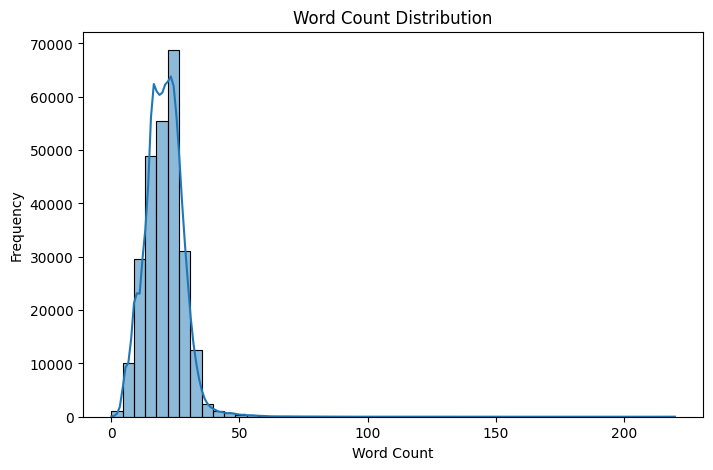

In [9]:
# Statistic Report
# Word Length Distribution
eda_df['word_count'] = eda_df['news'].apply(lambda x: len(str(x).split()))
eda_df['char_count'] = eda_df['news'].apply(lambda x: len(str(x)))

plt.figure(figsize=(8,5))
sns.histplot(eda_df['word_count'], bins=50, kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()



Top 5 Words:
+-----------+-------------+
| Word      |   Frequency |
+===========+=============+
| new       |       26840 |
+-----------+-------------+
| president |       13996 |
+-----------+-------------+
| one       |       10770 |
+-----------+-------------+
| said      |       10419 |
+-----------+-------------+
| first     |        8693 |
+-----------+-------------+


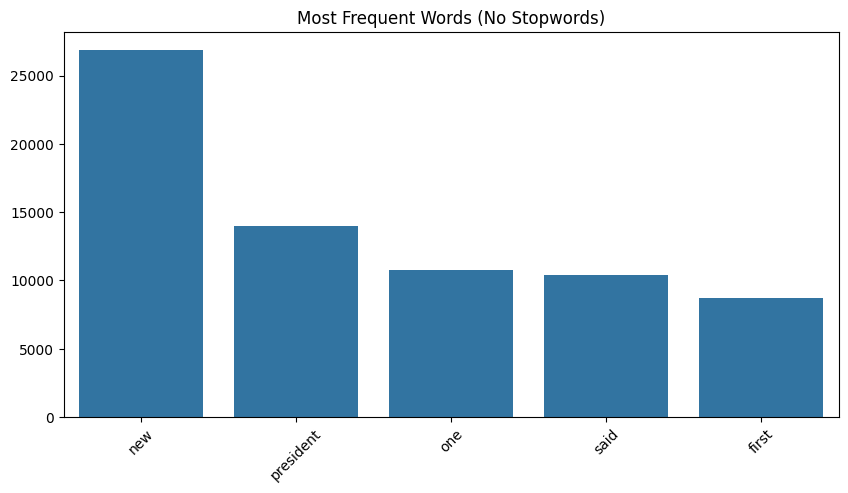

In [10]:
# Most Frequent Word
stop_words = set(stopwords.words('english'))
all_words = " ".join(eda_df['news']).split()
filtered_words = [w.lower() for w in all_words if w.lower() not in stop_words and w.isalpha()]

common_words = Counter(filtered_words).most_common(5)
word_table = [(word, freq) for word, freq in common_words]
print("\nTop 5 Words:")
print(tabulate(word_table, headers=["Word", "Frequency"], tablefmt="grid"))

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=[w[0] for w in common_words], y=[w[1] for w in common_words])
plt.xticks(rotation=45)
plt.title("Most Frequent Words (No Stopwords)")
plt.show()

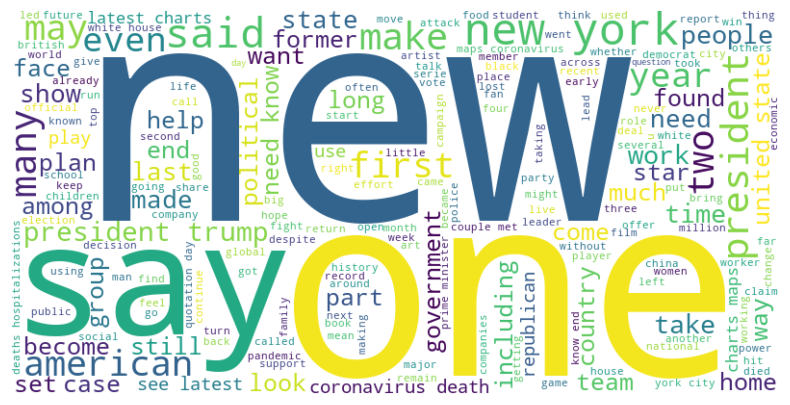

In [17]:
# Wordcloud
wc = WordCloud(width=800, height=400, background_color='white').generate(" ".join(filtered_words))
plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
# Detech Financial Ticker and Acronym
tickers = eda_df['news'].apply(lambda x: re.findall(r'\b[A-Z]{2,5}\b', str(x)))
all_tickers = Counter([t for sub in tickers for t in sub])

ticker_table  = [(ticker, freq) for ticker, freq in all_tickers.most_common(5)]
print("\nTop 5 Tickers/Acronyms:")
print(tabulate(ticker_table, headers=["Tickers/Acronyms", "Frequency"], tablefmt="grid"))



Top 5 Tickers/Acronyms:
+--------------------+-------------+
| Tickers/Acronyms   |   Frequency |
+====================+=============+
| BBC                |        2052 |
+--------------------+-------------+
| TV                 |        1461 |
+--------------------+-------------+
| UK                 |        1421 |
+--------------------+-------------+
| US                 |         990 |
+--------------------+-------------+
| NYT                |         765 |
+--------------------+-------------+


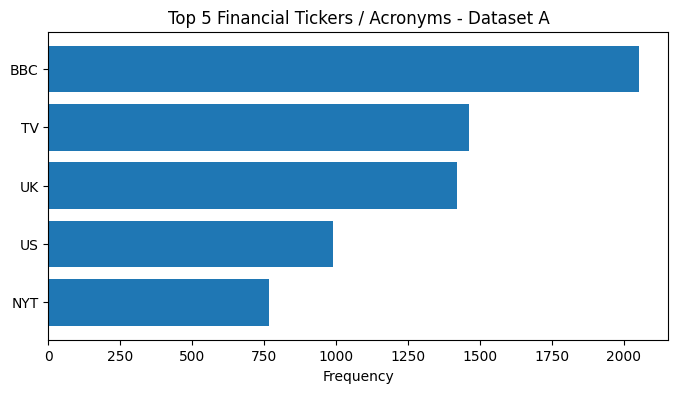

In [7]:
def plot_top_tickers(df, text_column, title):
    # Extract tickers
    tickers = df[text_column].apply(lambda x: re.findall(r'\b[A-Z]{2,5}\b', str(x)))
    all_tickers = Counter([t for sub in tickers for t in sub])
    top5 = all_tickers.most_common(5)

    # Separate keys and values
    labels = [x[0] for x in top5]
    counts = [x[1] for x in top5]

    # Plot
    plt.figure(figsize=(8, 4))
    plt.barh(labels, counts)
    plt.xlabel("Frequency")
    plt.title(f"Top 5 Financial Tickers / Acronyms - {title}")
    plt.gca().invert_yaxis()  # Highest at the top
    plt.show()

# Dataset A
plot_top_tickers(eda_df, 'news', "Dataset A")


In [11]:
# Misspelled Words Frequent
spell = SpellChecker()

# Count frequency of all words
word_freq = Counter(filtered_words)

# Find misspelled words
words = set(filtered_words)
misspelled = spell.unknown(words)


misspelled_counts = Counter([w for w in filtered_words if w in misspelled])
top_misspelled = misspelled_counts.most_common(5)

print(f"\nTotal Misspelled Words Found: {len(misspelled)}\n")
print("Top 5 Misspelled Words:")
print(tabulate(top_misspelled, headers=["Word", "Frequency"], tablefmt="grid"))


Total Misspelled Words Found: 26020

Top 5 Misspelled Words:
+-------------+-------------+
| Word        |   Frequency |
+=============+=============+
| coronavirus |        6116 |
+-------------+-------------+
| bbc         |        1642 |
+-------------+-------------+
| tv          |        1102 |
+-------------+-------------+
| tech        |        1014 |
+-------------+-------------+
| uk          |         982 |
+-------------+-------------+


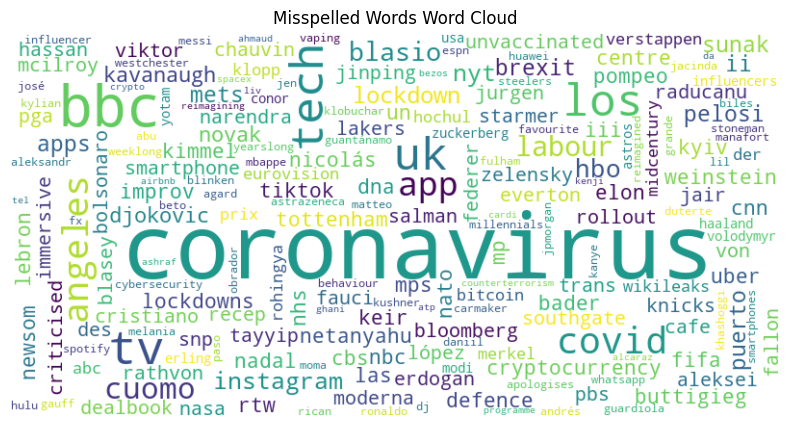

In [12]:
def plot_misspelled_wordcloud(misspelled_counts, title="Misspelled Words Word Cloud"):
    wc = WordCloud(width=800, height=400,
                   background_color='white').generate_from_frequencies(misspelled_counts)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_misspelled_wordcloud(misspelled_counts)


In [13]:
#Count Punctuation
def punctuation_stats(texts, top_n=5):
    all_text = " ".join(texts)
    punctuations = [char for char in all_text if char in string.punctuation]
    punct_count = len(punctuations)
    punct_freq = Counter(punctuations).most_common(top_n)
    return punct_count, punct_freq

total_punct, punct_freq = punctuation_stats(eda_df['news'], top_n=5)

# Show table of punctuation frequency (top 5)
print(f"\nTotal Punctuation Characters: {total_punct}")

print("\nTop 5 Punctuation Marks:")
print(tabulate(punct_freq, headers=["Punctuation", "Frequency"], tablefmt="grid"))


Total Punctuation Characters: 724105

Top 5 Punctuation Marks:
+---------------+-------------+
| Punctuation   |   Frequency |
+===============+=============+
| .             |      355033 |
+---------------+-------------+
| ,             |      241283 |
+---------------+-------------+
| -             |       66642 |
+---------------+-------------+
| '             |       13977 |
+---------------+-------------+
| ?             |       13381 |
+---------------+-------------+


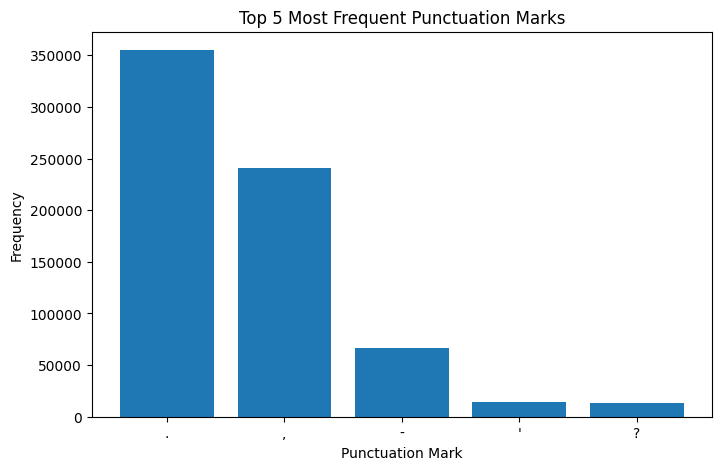

In [17]:
# Count ALL punctuation characters
def get_punct_freq(texts, top_n=5):
    all_text = " ".join(texts)
    punct_list = [char for char in all_text if char in string.punctuation]
    punct_counts = Counter(punct_list).most_common(top_n)
    return punct_counts

# Get top 5 punctuation marks
punct_freq = get_punct_freq(eda_df['news'], top_n=5)

# Prepare data
puncts = [p[0] for p in punct_freq]
counts = [p[1] for p in punct_freq]

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(puncts, counts)
plt.xlabel("Punctuation Mark")
plt.ylabel("Frequency")
plt.title("Top 5 Most Frequent Punctuation Marks")
plt.show()


In [ ]:
#Count Emoji
def emoji_stats(texts, top_n=5):
    all_text = " ".join(texts)
    emojis = [char for char in all_text if char in emoji.EMOJI_DATA]
    emoji_count = len(emojis)
    emoji_freq = Counter(emojis).most_common(top_n)
    return emoji_count, emoji_freq

total_emoji, emoji_freq = emoji_stats(eda_df['news'], top_n=5)


# Show table of top emojis
print(f"\nTotal Emojis: {total_emoji}")

print("\nTop 5 Emojis:")
print(tabulate(emoji_freq, headers=["Emoji", "Frequency"], tablefmt="grid"))


Total Emojis: 29

Top 5 Emojis:
+---------+-------------+
| Emoji   |   Frequency |
+=========+=============+
| ™       |           9 |
+---------+-------------+
| ®       |           8 |
+---------+-------------+
| 🗣       |           2 |
+---------+-------------+
| 🏛       |           1 |
+---------+-------------+
| 🤝      |           1 |
+---------+-------------+


In [18]:
#Count contraction
def contraction_stats(texts, top_n=5):
    contraction_pattern = r"\b(?:[A-Za-z]+['’][A-Za-z]+)\b"
    all_text = " ".join(texts)
    contractions_found = re.findall(contraction_pattern, all_text)
    contraction_count = len(contractions_found)
    contraction_freq = Counter(contractions_found).most_common(top_n)
    return contraction_count, contraction_freq

total_contractions, contraction_freq = contraction_stats(eda_df['news'], top_n=5)
print(f"\nTotal Contractions: {total_contractions}")
print("\nTop 5 Contractions:")
print(tabulate(contraction_freq, headers=["Contraction", "Frequency"], tablefmt="grid"))


Total Contractions: 93710

Top 5 Contractions:
+---------------+-------------+
| Contraction   |   Frequency |
+===============+=============+
| Here’s        |        4171 |
+---------------+-------------+
| Trump’s       |        2651 |
+---------------+-------------+
| It’s          |        2215 |
+---------------+-------------+
| it’s          |        2177 |
+---------------+-------------+
| week’s        |        1815 |
+---------------+-------------+


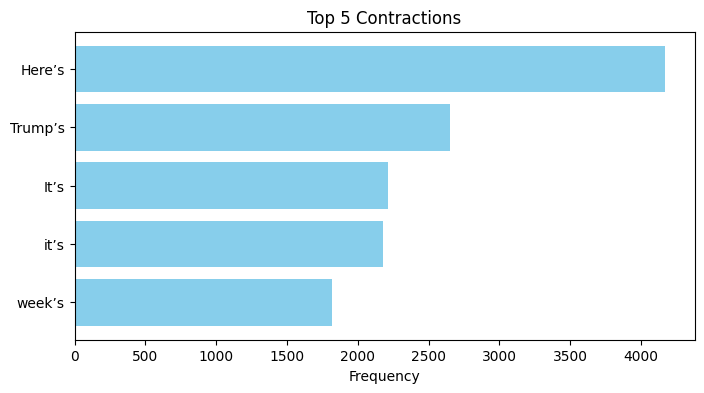

In [19]:
def plot_top_contractions(contraction_freq, title="Top 5 Contractions"):
    contractions = [x[0] for x in contraction_freq]
    counts = [x[1] for x in contraction_freq]

    plt.figure(figsize=(8, 4))
    plt.barh(contractions, counts, color='skyblue')
    plt.xlabel("Frequency")
    plt.title(title)
    plt.gca().invert_yaxis()  # Highest frequency on top
    plt.show()

plot_top_contractions(contraction_freq)


In [21]:
#Count URL
def url_stats(texts, top_n=5):
    url_pattern = r"(https?://\S+|www\.\S+)"
    all_text = " ".join(texts)
    urls_found = re.findall(url_pattern, all_text)
    url_count = len(urls_found)
    url_freq = Counter(urls_found).most_common(top_n)
    return url_count, url_freq

total_urls, url_freq = url_stats(eda_df['news'], top_n=5)
print(f"\nTotal URLs: {total_urls}")

print("\nTop 5 URLs:")
print(tabulate(url_freq, headers=["URL", "Frequency"], tablefmt="grid"))


Total URLs: 42

Top 5 URLs:
+---------------------------------------------------------------------------------------------------------------------------+-------------+
| URL                                                                                                                       |   Frequency |
+===========================================================================================================================+=============+
| www.foundationmedicine.com/f1cdx.                                                                                         |           4 |
+---------------------------------------------------------------------------------------------------------------------------+-------------+
| https://www.nytimes.com/2018/06/08/us/politics/orange-county-california-primary.html">most                                |           2 |
+---------------------------------------------------------------------------------------------------------------------------+------

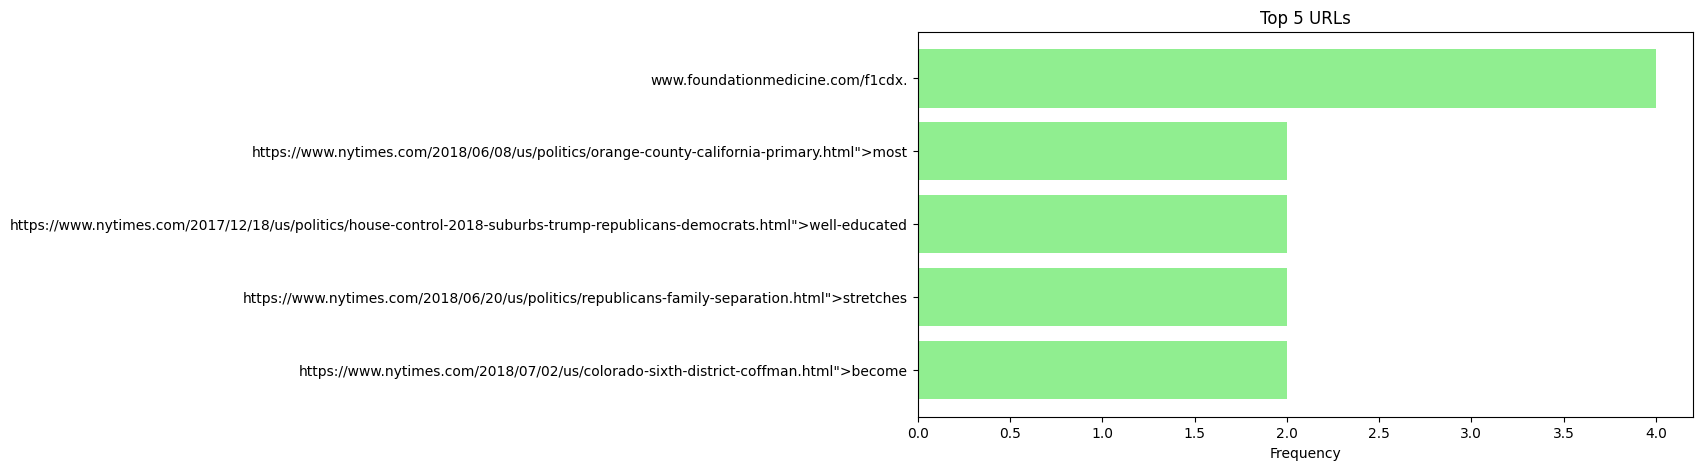

In [22]:
import matplotlib.pyplot as plt

def plot_top_urls(url_freq, title="Top 5 URLs"):
    urls = [x[0] for x in url_freq]
    counts = [x[1] for x in url_freq]

    plt.figure(figsize=(10, 5))
    plt.barh(urls, counts, color='lightgreen')
    plt.xlabel("Frequency")
    plt.title(title)
    plt.gca().invert_yaxis()  # Most frequent on top
    plt.show()

plot_top_urls(url_freq)


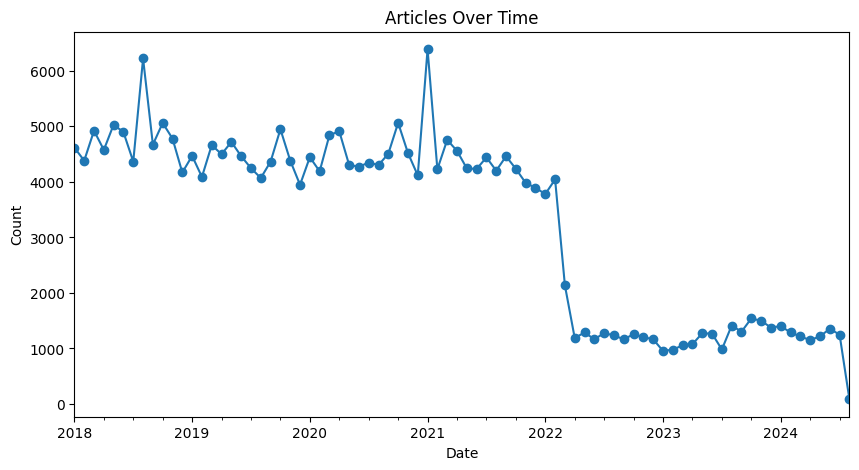

In [ ]:
# Artice Count Of Each Year
if 'date' in eda_df.columns:
    try:
        eda_df['date'] = pd.to_datetime(eda_df['date'], errors='coerce')
        eda_df['year_month'] = eda_df['date'].dt.to_period('M')
        monthly_counts = eda_df.groupby('year_month').size()

        plt.figure(figsize=(10,5))
        monthly_counts.plot(kind='line', marker='o')
        plt.title("Articles Over Time")
        plt.xlabel("Date")
        plt.ylabel("Count")
        plt.show()
    except Exception as e:
        print("Date parsing failed:", e)

In [53]:
# Bigram and Trigram Analysis
from nltk import ngrams

def get_top_ngrams(corpus, n=None, gram_size=2):
    vec = [tuple(gram) for sentence in corpus for gram in ngrams(sentence.split(), gram_size)]
    return Counter(vec).most_common(n)

top_bigrams = get_top_ngrams(eda_df['news'], n=5, gram_size=2)
top_trigrams = get_top_ngrams(eda_df['news'], n=5, gram_size=3)

# Bigram table
bigram_table = [(" ".join(bigram), freq) for bigram, freq in top_bigrams]
print("\nTop 5 Bigrams:")
print(tabulate(bigram_table, headers=["Bigram", "Frequency"], tablefmt="grid"))

# Trigram table
trigram_table = [(" ".join(trigram), freq) for trigram, freq in top_trigrams]
print("\nTop 5 Trigrams:")
print(tabulate(trigram_table, headers=["Trigram", "Frequency"], tablefmt="grid"))


Top 5 Bigrams:
+----------+-------------+
| Bigram   |   Frequency |
+==========+=============+
| of the   |       33154 |
+----------+-------------+
| in the   |       25606 |
+----------+-------------+
| to the   |       11224 |
+----------+-------------+
| on the   |        9808 |
+----------+-------------+
| in a     |        9302 |
+----------+-------------+

Top 5 Trigrams:
+-----------------+-------------+
| Trigram         |   Frequency |
+=================+=============+
| you need to     |        2920 |
+-----------------+-------------+
| what you need   |        2486 |
+-----------------+-------------+
| one of the      |        2370 |
+-----------------+-------------+
| Here’s what you |        2287 |
+-----------------+-------------+
| need to know    |        2002 |
+-----------------+-------------+


Preprocess news(2018-2024)

- Data Transformation

In [4]:
# Load the datasets
norm_df = pd.read_csv("Dataset/news(2018-2024).csv")

# Display first few rows
print(norm_df.head(7))
print( len(norm_df))

         date                                               news       neg  \
0  2018-01-01  Readers point to Congress, the Federal Railroa...  0.070000   
1  2018-01-01  The president of the Association of American U...  0.530158   
2  2018-01-01  Readers discuss family estrangement from the p...  0.094386   
3  2018-01-01  Vivir de forma segura en Caracas, una de las c...  0.072592   
4  2018-01-01  He proposed talks with South Korea to discuss ...  0.170111   
5  2018-01-01  It was an oddly quiet end to a season of debat...  0.401177   
6  2018-01-01  A reader decries a “draconian” plan to separat...  0.730084   

        neu       pos  compound sentiment  
0  0.881723  0.048277  0.992577  POSITIVE  
1  0.450715  0.019127  0.972401  NEGATIVE  
2  0.861070  0.044543  0.997616  POSITIVE  
3  0.854535  0.072872  0.871290  NEGATIVE  
4  0.734821  0.095068  0.789347  NEGATIVE  
5  0.549672  0.049151  0.926559  NEGATIVE  
6  0.261318  0.008599  0.981957  NEGATIVE  
262590


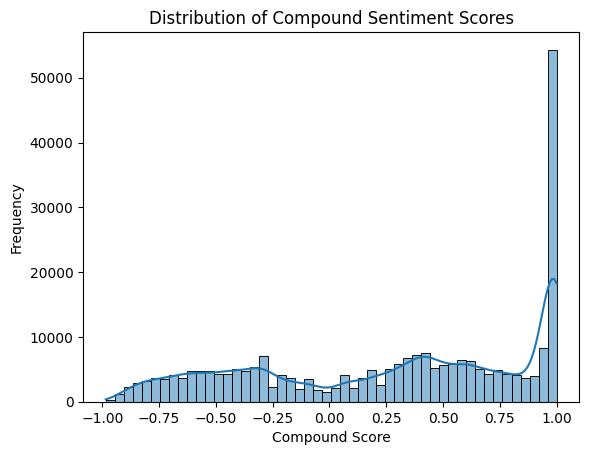

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(norm_df['compound'], bins=50, kde=True)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()


In [6]:
def get_sentiment_label(row):
    if row['compound'] >= 0.05:
        return "Positive"
    elif row['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

norm_df['sentiment'] = norm_df.apply(get_sentiment_label, axis=1)

# Drop unnecessary columns
norm_df.drop(columns=['date','neg','neu','pos','compound'], inplace=True)

# Save new dataset
norm_df.to_csv("Datasets/news_trans(2018-2024).csv", index=False)
print(norm_df['sentiment'].value_counts(normalize=True))
norm_df.head()


sentiment
Positive    0.654180
Negative    0.331304
Neutral     0.014517
Name: proportion, dtype: float64


,news,sentiment
0,"Readers point to Congress, the Federal Railroa...",Positive
1,The president of the Association of American U...,Positive
2,Readers discuss family estrangement from the p...,Positive
3,"Vivir de forma segura en Caracas, una de las c...",Positive
4,He proposed talks with South Korea to discuss ...,Positive


- Data Cleaning (All Case)

In [6]:
# Load the datasets
filt_df = pd.read_csv("Datasets\\news_trans(2018-2024).csv")

# Display first few rows
print(filt_df.head(7))
print( len(filt_df))

                                                news sentiment
0  Readers point to Congress, the Federal Railroa...  Positive
1  The president of the Association of American U...  Positive
2  Readers discuss family estrangement from the p...  Positive
3  Vivir de forma segura en Caracas, una de las c...  Positive
4  He proposed talks with South Korea to discuss ...  Positive
5  It was an oddly quiet end to a season of debat...  Positive
6  A reader decries a “draconian” plan to separat...  Positive
262590


- Preprocess for all case

In [1]:
#Load Libraries
import re
import string
import nltk
import spacy
import emoji
import contractions
from bs4 import BeautifulSoup
from langdetect import detect
from urlextract import URLExtract
from tqdm import tqdm
from symspellpy import SymSpell, Verbosity
from collections import Counter
from nltk.corpus import stopwords


In [2]:
nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')

sym_spell = SymSpell(max_dictionary_edit_distance=1, prefix_length=7)
dictionary_path = "SymSpell_Dictionary\\frequency_dictionary_en_82_765.txt"
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

correction_counter = Counter()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JohnTan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
def spell_correct(text):
    corrected_words = []
    for word in text.split():
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=1)
        if suggestions:
            corrected_words.append(suggestions[0].term)
        else:
            corrected_words.append(word)
    return ' '.join(corrected_words)

def preprocess(text):

    def is_valid_text(text):
        return isinstance(text, str) and text.strip() != ''

    def is_english(text, target_language='en'):
        try:
            return detect(text) == target_language
        except:
            return False

    def text_cleaning(text):
        # Lowecase text
        text = text.lower()

        # Detect Emoji and Replace with text
        text = emoji.replace_emoji(text, replace=lambda e, _: emoji.demojize(e).strip(':').replace('_', ' '))

        # Detect and Expend contraction
        text = contractions.fix(text)

        # Detect and Remove HTML Tag
        text = BeautifulSoup(text, "html.parser").get_text(separator=" ")

        # Identify and Remove URLs
        extractor = URLExtract()
        urls = extractor.find_urls(text)
        for url in urls:
            text = text.replace(url, '') 

        # Detect and Remove Punctuation
        text = ''.join([char for char in text if char not in string.punctuation])

        # Detect and Remove Special Symbol
        text = re.sub(r'\W', ' ', text)

        # Correct Misspelled Word
        text = spell_correct(text)

        # Lemmatize The Text
        doc = nlp(text)
        text = ' '.join([token.lemma_ for token in doc])

        return text

    text = str(text)

    if not is_valid_text(text):
        return ""
    text = text.strip()

    if not is_english(text):
        return ""

    return text_cleaning(text)
   


tqdm.pandas()
filt_df['preprocessed_news'] = filt_df['news'].progress_apply(preprocess)
filt_df = filt_df[filt_df['preprocessed_news'].str.strip() != '']
filt_df.head()

100%|██████████| 262590/262590 [1:32:27<00:00, 47.34it/s]


,news,sentiment,preprocessed_news
0,"Readers point to Congress, the Federal Railroa...",Positive,reader point to congress they federal railroad...
1,The president of the Association of American U...,Positive,they president of they association of american...
2,Readers discuss family estrangement from the p...,Positive,reader discuss family estrangement from they p...
4,He proposed talks with South Korea to discuss ...,Positive,he propose talk with south korea to discuss th...
5,It was an oddly quiet end to a season of debat...,Positive,it be an oddly quiet end to a season of debate...


In [36]:
# Count functions
def count_urls(text):
    return len(re.findall(r'http\S+|www\.\S+', text))

def count_emojis(text):
    return len(emoji.emoji_list(text))

def count_special_chars(text):
    return len(re.findall(r'[^a-zA-Z0-9\s]', text))

def count_contractions(text):
    contraction_pattern = re.compile(r"\b(?:[a-zA-Z]+['’][a-zA-Z]+)\b")
    return len(contraction_pattern.findall(text))

def count_punctuation(text):
    return sum(1 for char in text if char in string.punctuation)

# Unique word count
def count_unique_words(text):
    return len(set(text.split()))

# Create metrics before and after
insights = pd.DataFrame({
    "Metric": [
        "Avg text length (chars)",
        "Avg text length (words)",
        "Total URLs",
        "Total Emojis",
        "Total Special Characters",
        "Total Punctuation Marks",
        "Total Contractions",
        "Unique Words Count",
        "Total Corrections Made"
    ],
    "Before": [
        filt_df['news'].str.len().mean(),
        filt_df['news'].str.split().apply(len).mean(),
        filt_df['news'].apply(count_urls).sum(),
        filt_df['news'].apply(count_emojis).sum(),
        filt_df['news'].apply(count_special_chars).sum(),
        filt_df['news'].apply(count_punctuation).sum(),
        filt_df['news'].apply(count_contractions).sum(),
        filt_df['news'].apply(count_unique_words).sum(),
        sum(correction_counter.values())
    ],
    "After": [
        filt_df['preprocessed_news'].str.len().mean(),
        filt_df['preprocessed_news'].str.split().apply(len).mean(),
        filt_df['preprocessed_news'].apply(count_urls).sum(),
        filt_df['preprocessed_news'].apply(count_emojis).sum(),
        filt_df['preprocessed_news'].apply(count_special_chars).sum(),
        filt_df['preprocessed_news'].apply(count_punctuation).sum(),
        filt_df['preprocessed_news'].apply(count_contractions).sum(),
        filt_df['preprocessed_news'].apply(count_unique_words).sum(),
        sum(correction_counter.values()) 
    ]
})

print(insights)


                     Metric        Before         After
0   Avg text length (chars)  1.249706e+02  1.182091e+02
1   Avg text length (words)  2.063953e+01  2.091094e+01
2                Total URLs  4.200000e+01  0.000000e+00
3              Total Emojis  2.900000e+01  0.000000e+00
4  Total Special Characters  8.882410e+05  1.558000e+03
5   Total Punctuation Marks  7.226100e+05  9.600000e+01
6        Total Contractions  9.353900e+04  0.000000e+00
7        Unique Words Count  5.075268e+06  4.972764e+06
8    Total Corrections Made  0.000000e+00  0.000000e+00


In [ ]:
#Save to csv
filt_df.to_csv("Dataset/news_cleaned3(2018-2024).csv", columns=['date','news','neg','neu','pos','compound','preprocessed_news','sentiment'],index=False)
print(filt_df.head)

<bound method NDFrame.head of               date                                               news  \
0       2018-01-01  Readers point to Congress, the Federal Railroa...   
1       2018-01-01  The president of the Association of American U...   
2       2018-01-01  Readers discuss family estrangement from the p...   
3       2018-01-01  He proposed talks with South Korea to discuss ...   
4       2018-01-01  It was an oddly quiet end to a season of debat...   
...            ...                                                ...   
261590  2024-08-02  Cars were set alight, and beer cans and stones...   
261591  2024-08-02  Great Britain continue their most successful s...   
261592  2024-08-02  Pentagon announces Middle East reinforcements ...   
261593  2024-08-03  Bucharest has lifted a moratorium on bear hunt...   
261594  2024-08-03  Finalist Chidimma Adetshina's participation re...   

             neg       neu       pos  compound  \
0       0.070000  0.881723  0.048277  0.992

In [ ]:
# Statistic Analyze After Cleaning
def count_urls(text):
    return len(re.findall(r'http\S+|www\.\S+', text))

def count_emojis(text):
    return len(emoji.emoji_list(text))

def count_special_chars(text):
    return len(re.findall(r'[^a-zA-Z0-9\s]', text))

# Create metrics before and after
insights = pd.DataFrame({
    "Metric": [
        "Avg text length (chars)",
        "Avg text length (words)",
        "Total URLs",
        "Total Emojis",
        "Total Special Characters",
        "Total Corrections Made"
    ],
    "Before": [
        filt_df['news'].str.len().mean(),
        filt_df['news'].str.split().apply(len).mean(),
        filt_df['news'].apply(count_urls).sum(),
        filt_df['news'].apply(count_emojis).sum(),
        filt_df['news'].apply(count_special_chars).sum(),
        sum(correction_counter.values())
    ],
    "After": [
        filt_df['preprocessed_news'].str.len().mean(),
        filt_df['preprocessed_news'].str.split().apply(len).mean(),
        filt_df['preprocessed_news'].apply(count_urls).sum(),
        filt_df['preprocessed_news'].apply(count_emojis).sum(),
        filt_df['preprocessed_news'].apply(count_special_chars).sum(),
        sum(correction_counter.values()) 
    ]
})

print(insights)


                     Metric         Before        After
0   Avg text length (chars)     124.935003   123.174155
1   Avg text length (words)      20.633582    20.897123
2                Total URLs      42.000000     0.000000
3              Total Emojis      29.000000     0.000000
4  Total Special Characters  888469.000000  1470.000000
5    Total Corrections Made       0.000000     0.000000


In [ ]:
#Save to csv
filt_df.to_csv("Dataset/news_cleaned2(2018-2024).csv", columns=['date','news','neg','neu','pos','compound','preprocessed_news','sentiment'],index=False)
print(filt_df.head)

<bound method NDFrame.head of               date                                               news  \
0       2018-01-01  Readers point to Congress, the Federal Railroa...   
1       2018-01-01  The president of the Association of American U...   
2       2018-01-01  Readers discuss family estrangement from the p...   
4       2018-01-01  He proposed talks with South Korea to discuss ...   
5       2018-01-01  It was an oddly quiet end to a season of debat...   
...            ...                                                ...   
262585  2024-08-02  Cars were set alight, and beer cans and stones...   
262586  2024-08-02  Great Britain continue their most successful s...   
262587  2024-08-02  Pentagon announces Middle East reinforcements ...   
262588  2024-08-03  Bucharest has lifted a moratorium on bear hunt...   
262589  2024-08-03  Finalist Chidimma Adetshina's participation re...   

             neg       neu       pos  compound sentiment  \
0       0.070000  0.881723  0.048

- Data Transformation

In [2]:
import pandas as pd
# Load the datasets
norm_df = pd.read_csv("Dataset/news_cleaned2(2018-2024).csv")

# Display first few rows
print(norm_df.head(7))
print( len(norm_df))

         date                                               news       neg  \
0  2018-01-01  Readers point to Congress, the Federal Railroa...  0.070000   
1  2018-01-01  The president of the Association of American U...  0.530158   
2  2018-01-01  Readers discuss family estrangement from the p...  0.094386   
3  2018-01-01  He proposed talks with South Korea to discuss ...  0.170111   
4  2018-01-01  It was an oddly quiet end to a season of debat...  0.401177   
5  2018-01-01  A reader decries a “draconian” plan to separat...  0.730084   
6  2018-01-01  The Oakland Raiders, Detroit Lions, Indianapol...  0.026797   

        neu       pos  compound  \
0  0.881723  0.048277  0.992577   
1  0.450715  0.019127  0.972401   
2  0.861070  0.044543  0.997616   
3  0.734821  0.095068  0.789347   
4  0.549672  0.049151  0.926559   
5  0.261318  0.008599  0.981957   
6  0.892082  0.081121  0.965393   

                                   preprocessed_news sentiment  
0  readers point to congress 

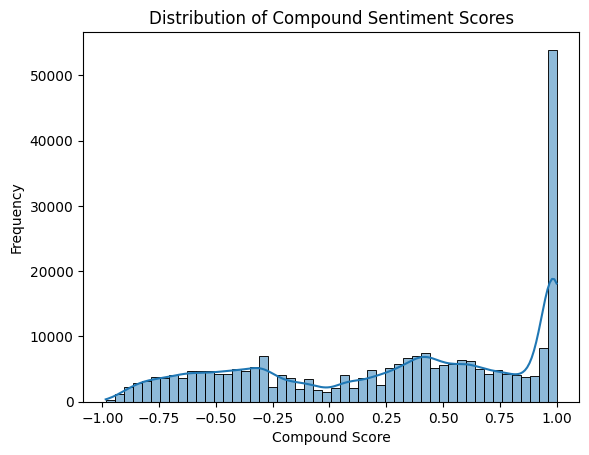

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(norm_df['compound'], bins=50, kde=True)
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.show()


In [49]:
def get_sentiment_label(row):
    if row['compound'] >= 0.05:
        return "Positive"
    elif row['compound'] <= -0.05:
        return "Negative"
    else:
        return "Neutral"

norm_df['sentiment'] = norm_df.apply(get_sentiment_label, axis=1)

# Drop unnecessary columns
norm_df.drop(columns=['date','neg','neu','pos','compound'], inplace=True)

# Save new dataset
norm_df.to_csv("Dataset/news_cleaned_trans(2018-2024).csv", index=False)
print(norm_df['sentiment'].value_counts(normalize=True))
norm_df.head()


sentiment
Positive    0.653304
Negative    0.332132
Neutral     0.014564
Name: proportion, dtype: float64


,news,preprocessed_news,sentiment
0,"Readers point to Congress, the Federal Railroa...",readers point to congress they federal railroa...,Positive
1,The president of the Association of American U...,they president of they association of american...,Positive
2,Readers discuss family estrangement from the p...,readers discuss family estrangement from they ...,Positive
3,He proposed talks with South Korea to discuss ...,he proposed talks with south korea to discuss ...,Positive
4,It was an oddly quiet end to a season of debat...,it was an oddly quiet end to a season of debat...,Positive


- Data Cleaning for FinBERT

In [3]:
# Load the datasets
fbclean_df = pd.read_csv("Datasets\\news_trans(2018-2024).csv")

# Display first few rows
print(fbclean_df.head(7))
print( len(fbclean_df))

                                                news sentiment
0  Readers point to Congress, the Federal Railroa...  Positive
1  The president of the Association of American U...  Positive
2  Readers discuss family estrangement from the p...  Positive
3  Vivir de forma segura en Caracas, una de las c...  Positive
4  He proposed talks with South Korea to discuss ...  Positive
5  It was an oddly quiet end to a season of debat...  Positive
6  A reader decries a “draconian” plan to separat...  Positive
262590


In [4]:
import re
import string
from bs4 import BeautifulSoup
from langdetect import detect
import emoji
from urlextract import URLExtract
import contractions
from tqdm import tqdm
from symspellpy import SymSpell, Verbosity

# OPTIONAL: Ticker & acronym whitelist
def detect_protected_terms(text_series):
    """Detect uppercase tickers/acronyms from the dataset."""
    pattern = r'\$[A-Z]{1,5}\b|\b[A-Z]{2,5}\b'
    terms = set()
    for text in text_series.dropna():
        matches = re.findall(pattern, text)
        matches = [m.lstrip('$') for m in matches]  # Remove $ for consistency
        terms.update(matches)
    return terms

protected_words = set([
    "USD", "EUR", "AAPL", "TSLA", "GOOG", "MSFT", "SEC", "GDP", "NASDAQ", "NYSE"
])

# SymSpell setup
sym_spell = SymSpell(max_dictionary_edit_distance=1, prefix_length=7)
dictionary_path = "SymSpell_Dictionary/frequency_dictionary_en_82_765.txt"
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

def spell_correct(text):
    corrected_words = []
    for word in text.split():
        if word.upper() in protected_words:  # Protect finance terms
            corrected_words.append(word)
            continue
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=1)
        if suggestions:
            corrected_words.append(suggestions[0].term)
        else:
            corrected_words.append(word)
    return ' '.join(corrected_words)

def preprocess(text):

    def is_valid_text(txt):
        return isinstance(txt, str) and txt.strip() != ''

    def is_english(txt, target_language='en'):
        try:
            return detect(txt) == target_language
        except:
            return False

    def text_cleaning(txt):
        # 1. Expand contractions (e.g., don't → do not)
        txt = contractions.fix(txt)

        # 2. Replace emojis with descriptive text
        txt = emoji.replace_emoji(txt, replace=lambda e, _: emoji.demojize(e).strip(':').replace('_', ' '))

        # 3. Remove HTML tags
        txt = BeautifulSoup(txt, "html.parser").get_text(separator=" ")

        # 4. Remove URLs
        extractor = URLExtract()
        urls = extractor.find_urls(txt)
        for url in urls:
            txt = txt.replace(url, '')

        # 5. Remove unwanted punctuation but KEEP $, %, +, -
        punctuation_to_remove = ''.join(ch for ch in string.punctuation if ch not in ['$','%','+','-'])
        txt = txt.translate(str.maketrans('', '', punctuation_to_remove))

        # 6. Replace multiple spaces with single space
        txt = re.sub(r'\s+', ' ', txt).strip()

        # 7. Optional: Spell correction (safe for finance terms)
        # txt = spell_correct(txt)

        return txt

    text = str(text)

    if not is_valid_text(text):
        return ""
    text = text.strip()

    if not is_english(text):
        return ""

    return text_cleaning(text)


# Usage with progress bar
tqdm.pandas()

protected_words = detect_protected_terms(fbclean_df['news'])

fbclean_df['preprocessed_news'] = fbclean_df['news'].progress_apply(preprocess)

# Remove empty rows
fbclean_df = fbclean_df[fbclean_df['preprocessed_news'].str.strip() != '']


fbclean_df.head()


100%|██████████| 262590/262590 [57:53<00:00, 75.61it/s]   


,news,sentiment,preprocessed_news
0,"Readers point to Congress, the Federal Railroa...",Positive,Readers point to Congress the Federal Railroad...
1,The president of the Association of American U...,Positive,The president of the Association of American U...
2,Readers discuss family estrangement from the p...,Positive,Readers discuss family estrangement from the p...
4,He proposed talks with South Korea to discuss ...,Positive,He proposed talks with South Korea to discuss ...
5,It was an oddly quiet end to a season of debat...,Positive,It was an oddly quiet end to a season of debat...


In [9]:
# Count functions
def count_urls(text):
    return len(re.findall(r'http\S+|www\.\S+', text))

def count_emojis(text):
    return len(emoji.emoji_list(text))

def count_special_chars(text):
    return len(re.findall(r'[^a-zA-Z0-9\s]', text))

def count_contractions(text):
    contraction_pattern = re.compile(r"\b(?:[a-zA-Z]+['’][a-zA-Z]+)\b")
    return len(contraction_pattern.findall(text))

def count_punctuation(text):
    return sum(1 for char in text if char in string.punctuation)

# Unique word count
def count_unique_words(text):
    return len(set(text.split()))

# Create metrics before and after
insights = pd.DataFrame({
    "Metric": [
        "Avg text length (chars)",
        "Avg text length (words)",
        "Total URLs",
        "Total Emojis",
        "Total Special Characters",
        "Total Punctuation Marks",
        "Total Contractions",
        "Unique Words Count",
        "Total Corrections Made"
    ],
    "Before": [
        fbclean_df['news'].str.len().mean(),
        fbclean_df['news'].str.split().apply(len).mean(),
        fbclean_df['news'].apply(count_urls).sum(),
        fbclean_df['news'].apply(count_emojis).sum(),
        fbclean_df['news'].apply(count_special_chars).sum(),
        fbclean_df['news'].apply(count_punctuation).sum(),
        fbclean_df['news'].apply(count_contractions).sum(),
        fbclean_df['news'].apply(count_unique_words).sum(),
        sum(correction_counter.values())
    ],
    "After": [
        fbclean_df['preprocessed_news'].str.len().mean(),
        fbclean_df['preprocessed_news'].str.split().apply(len).mean(),
        fbclean_df['preprocessed_news'].apply(count_urls).sum(),
        fbclean_df['preprocessed_news'].apply(count_emojis).sum(),
        fbclean_df['preprocessed_news'].apply(count_special_chars).sum(),
        fbclean_df['preprocessed_news'].apply(count_punctuation).sum(),
        fbclean_df['preprocessed_news'].apply(count_contractions).sum(),
        fbclean_df['preprocessed_news'].apply(count_unique_words).sum(),
        sum(correction_counter.values()) 
    ]
})

print(insights)


                     Metric        Before         After
0   Avg text length (chars)  1.249382e+02  1.225676e+02
1   Avg text length (words)  2.063416e+01  2.073174e+01
2                Total URLs  4.200000e+01  0.000000e+00
3              Total Emojis  2.900000e+01  0.000000e+00
4  Total Special Characters  8.884520e+05  2.104770e+05
5   Total Punctuation Marks  7.227790e+05  7.067400e+04
6        Total Contractions  9.356500e+04  5.580200e+04
7        Unique Words Count  5.076252e+06  5.087107e+06
8    Total Corrections Made  0.000000e+00  0.000000e+00


In [10]:
#Save to csv
fbclean_df.to_csv("Datasets/news_cleaned_trans_fin(2018-2024).csv", columns=['news','preprocessed_news','sentiment'],index=False)
print(fbclean_df.head)

<bound method NDFrame.head of                                                      news sentiment  \
0       Readers point to Congress, the Federal Railroa...  Positive   
1       The president of the Association of American U...  Positive   
2       Readers discuss family estrangement from the p...  Positive   
4       He proposed talks with South Korea to discuss ...  Positive   
5       It was an oddly quiet end to a season of debat...  Positive   
...                                                   ...       ...   
262585  Cars were set alight, and beer cans and stones...  Negative   
262586  Great Britain continue their most successful s...  Positive   
262587  Pentagon announces Middle East reinforcements ...  Negative   
262588  Bucharest has lifted a moratorium on bear hunt...  Positive   
262589  Finalist Chidimma Adetshina's participation re...  Positive   

                                        preprocessed_news  
0       Readers point to Congress the Federal Railroad...